In [1]:
%reset
%reset -s -f

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:

from scipy.ndimage import gaussian_filter
import cv2
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Read Image and convert to array

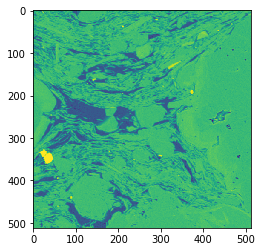

In [235]:
f = '/home/admin66/Downloads/traindata/Woodford_25nm_8bit_20040x17543/Woodford_25nm_8bit_20040x17543(0x0).png'
m = imread(f)
plt.imshow(m)
plt.show()

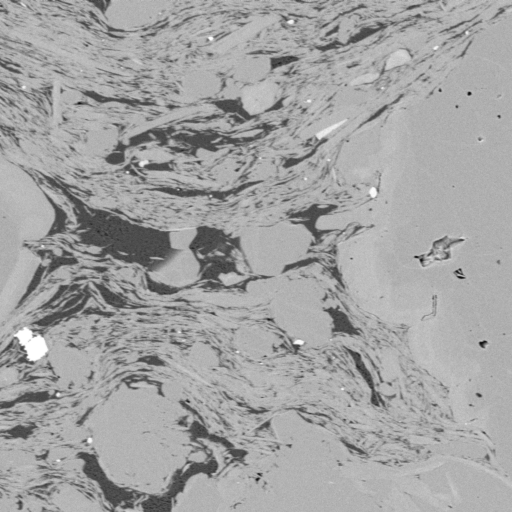

In [4]:
from PIL import Image
img = Image.open(f)# if you want to convert from color to gray use>> .convert('LA') <<ar the end
img


In [113]:
aimg = np.array(img)
aimg

array([[174, 180, 186, ..., 182, 182, 184],
       [173, 164, 162, ..., 184, 184, 185],
       [140, 159, 163, ..., 183, 184, 173],
       ...,
       [170, 176, 178, ..., 174, 179, 183],
       [182, 178, 177, ..., 176, 174, 178],
       [181, 179, 175, ..., 175, 178, 181]], dtype=uint8)

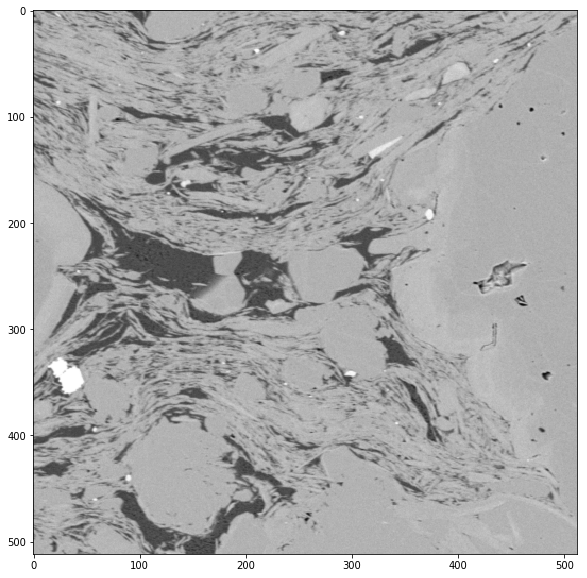

In [115]:
plt.figure(figsize=(20,10))
plt.imshow(aimg,cmap=cm.gray, vmin=0, vmax=255)

# Gaussian Smoothing 

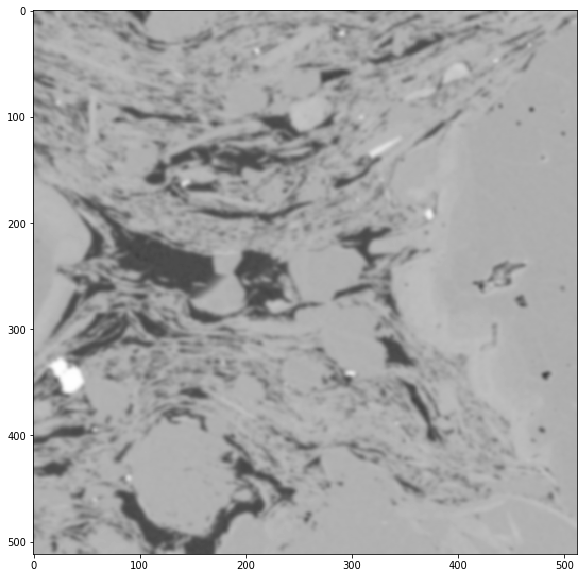

In [7]:
plt.figure(figsize=(20,10))
gaussian_smoothing = gaussian_filter(aimg, sigma=1.6)
plt.imshow(gaussian_smoothing,cmap=cm.gray, vmin=0, vmax=255)

# Laplacian of Gaussian

In [8]:
from scipy import ndimage

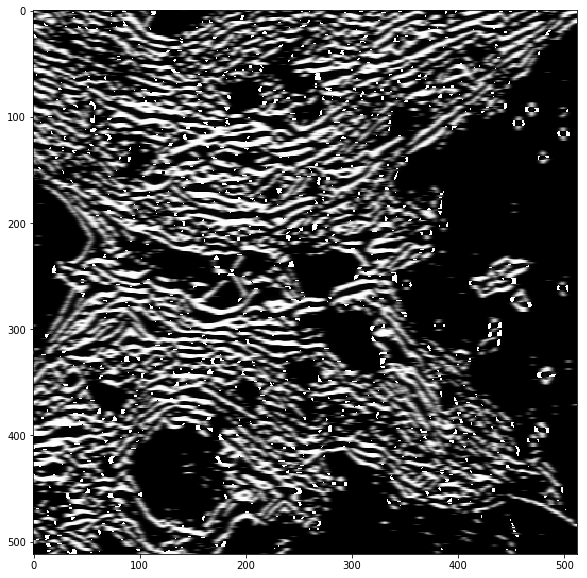

In [109]:
lapGaussian = ndimage.gaussian_laplace(aimg, sigma=2) # gaussian_smoothing
plt.figure(figsize=(20,10))
plt.imshow(lapGaussian,cmap=cm.gray, vmin=0, vmax=255)
plt.show()
plt.close()

# gaussian_gradient_magnitude feature

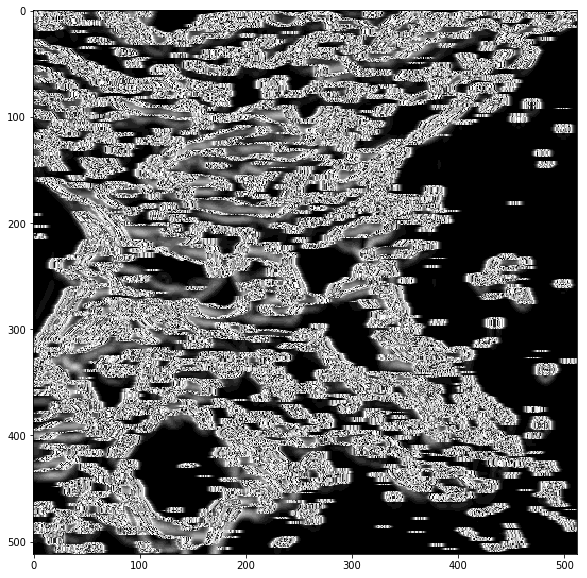

In [55]:
gradMagGaussian = ndimage.gaussian_gradient_magnitude(aimg, sigma=3.6) # lapGaussian , gaussian_smoothing
plt.figure(figsize=(20,10))
plt.imshow(gradMagGaussian,cmap=cm.gray)
plt.show()
plt.close()

# Difference of Gaussian

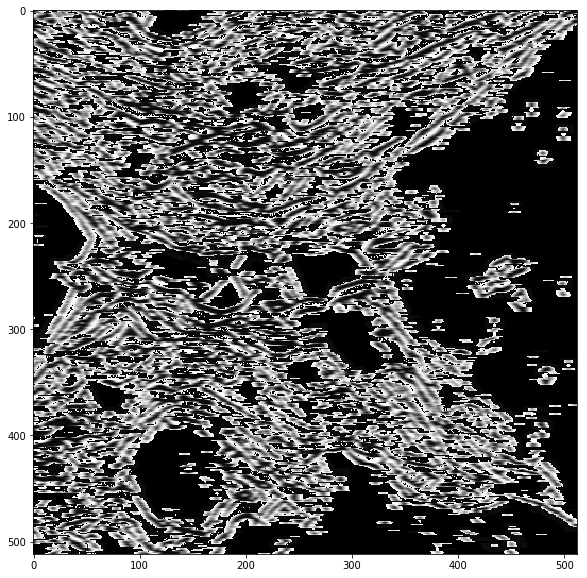

In [56]:
dog = gradMagGaussian - lapGaussian
plt.figure(figsize=(20,10))
plt.imshow(dog,cmap=cm.gray)
plt.show()
plt.close()

# Compute Eigen values of structure tensor.

https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.structure_tensor_eigvals

l1ndarray
Larger eigen value for each input matrix.

l2ndarray
Smaller eigen value for each input matrix.

In [70]:
from skimage.feature import structure_tensor, structure_tensor_eigvals
Axx, Axy, Ayy = structure_tensor(aimg, sigma=1.6)
eigenvalues0 = structure_tensor_eigvals(Axx, Axy, Ayy)[0]
eigenvalues1 = structure_tensor_eigvals(Axx, Axy, Ayy)[1]
eigenvalues0.shape

(512, 512)

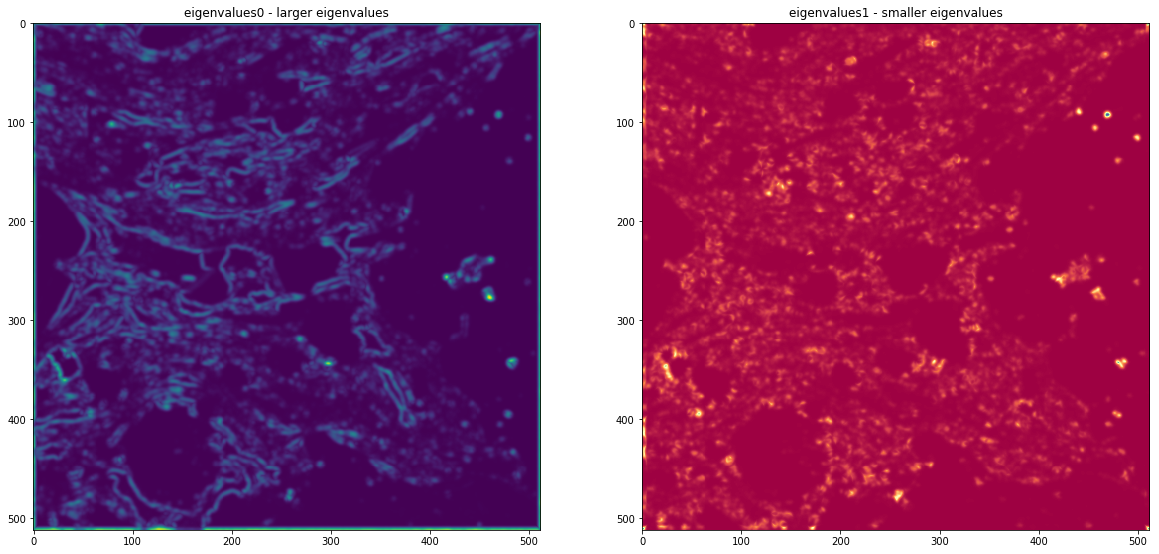

In [74]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(eigenvalues0)
plt.title('eigenvalues0 - larger eigenvalues')

plt.subplot(122)
plt.imshow(eigenvalues1,cmap=plt.cm.Spectral)
plt.title('eigenvalues1 - smaller eigenvalues')

plt.show()
plt.close()

# Hessian of Gaussian Eigenvalues

In [79]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

In [84]:
H_elems = hessian_matrix(aimg, sigma=1.6)
H_Eigenvalues0 = hessian_matrix_eigvals(H_elems)[0]
H_Eigenvalues1 = hessian_matrix_eigvals(H_elems)[1]

H_Eigenvalues0.shape

(512, 512)

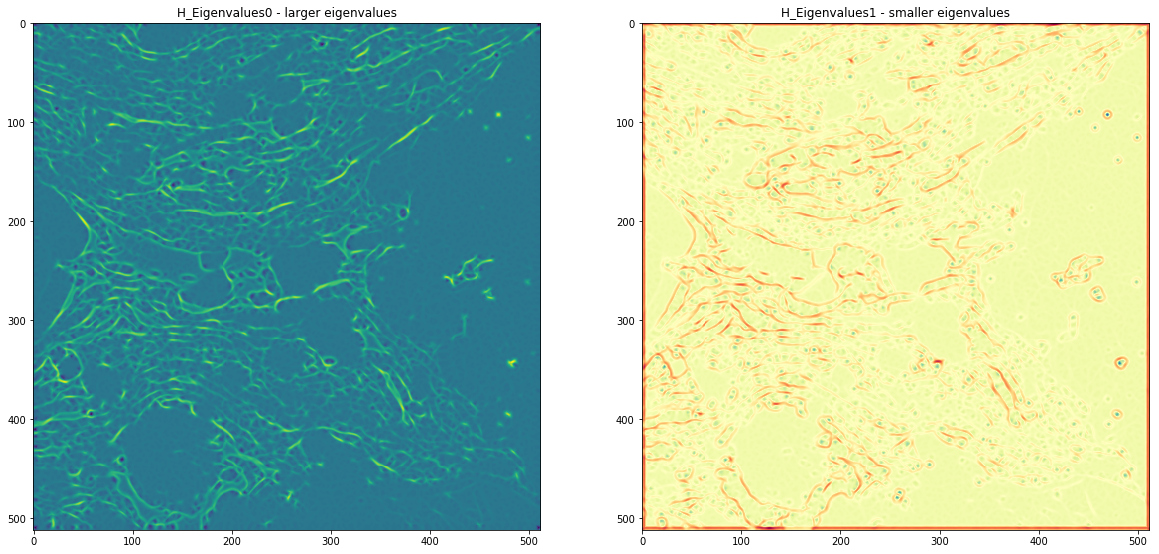

In [136]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(H_Eigenvalues0)
plt.title('H_Eigenvalues0 - larger eigenvalues')

plt.subplot(122)
plt.imshow(H_Eigenvalues1,cmap=plt.cm.Spectral)
plt.title('H_Eigenvalues1 - smaller eigenvalues')

plt.show()
plt.close()


# Getting sample segmentations of labels from ilastic

In [144]:
import cv2
import numpy as np
import h5py
import matplotlib.pyplot as plt
import time
s = h5py.File('/home/admin66/Downloads/traindata/Woodford_25nm_8bit_20040x17543/Woodford_25nm_8bit_20040x17543(0x0)_Simple Segmentation.h5', 'r')


In [145]:
dset = s['exported_data']
dset.shape
dset[1].shape
type(dset)

h5py._hl.dataset.Dataset

In [146]:
data2get = s.get('exported_data')[:]
data = np.array(data2get) #dataset_name is same as hdf5 object na
data.shape
data[:,:,0]

array([[3., 3., 3., ..., 1., 1., 1.],
       [3., 3., 3., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

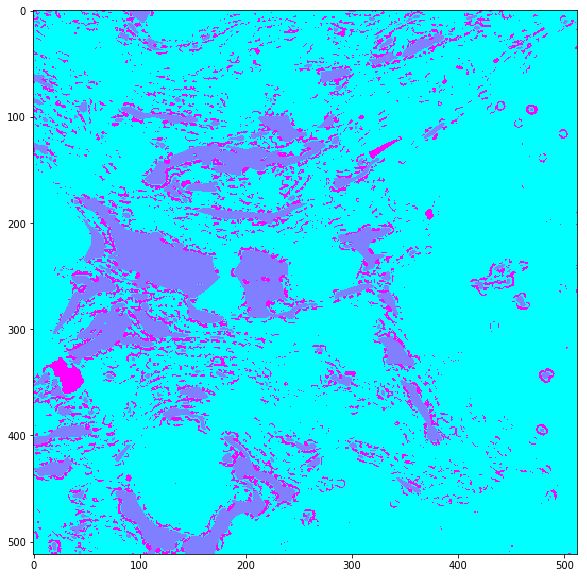

In [147]:
img = np.zeros(512*512).astype(np.uint8)
img = np.flipud( np.rot90( img.reshape(512,512), k=1 ) )
plt.figure(figsize=(20,10))
img[data[:,:,0] == 1] = 250
img[data[:,:,0] == 2] = 100
img[data[:,:,0] == 3] = 50
plt.imshow(data[:,:,0],cmap=cm.cool) #[indexedImage, cmap]
plt.show()
plt.close()

# Read labeled Labeled image

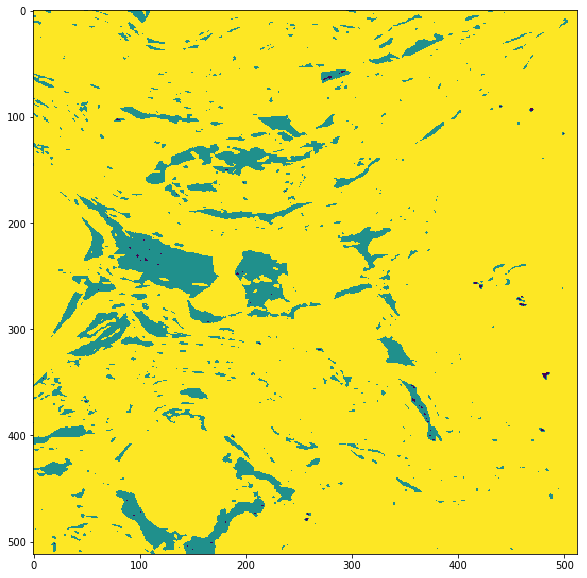

In [237]:
f2 = '/home/admin66/Downloads/labels/Woodford_25nm_8bit_20040x17543/Woodford_25nm_8bit_20040x17543(0x0).png'
img2 = Image.open(f2)# if you want to convert from color to gray use>> .convert('LA') <<ar the end
img2
img2 = np.array(img2)
plt.figure(figsize=(20,10))
plt.imshow(img2)
plt.show()
plt.close()

# Random forest training from ilastic labeled data and original data

In [218]:
data[:,:,0] # labeled data from h5 file
img2 # from img labeled data


(512, 512)

In [149]:
aimg # raw data

array([[174, 180, 186, ..., 182, 182, 184],
       [173, 164, 162, ..., 184, 184, 185],
       [140, 159, 163, ..., 183, 184, 173],
       ...,
       [170, 176, 178, ..., 174, 179, 183],
       [182, 178, 177, ..., 176, 174, 178],
       [181, 179, 175, ..., 175, 178, 181]], dtype=uint8)

In [163]:
layerimg = np.empty((512, 512, 9))
layerimg[:,:,0] = aimg 
layerimg[:,:,1] = gaussian_smoothing 
layerimg[:,:,2] = lapGaussian 
layerimg[:,:,3] = gradMagGaussian 
layerimg[:,:,4] = dog 
layerimg[:,:,5] = eigenvalues0 
layerimg[:,:,6] = eigenvalues1 
layerimg[:,:,7] = H_Eigenvalues0 
layerimg[:,:,8] = H_Eigenvalues1 

(512, 512, 9)

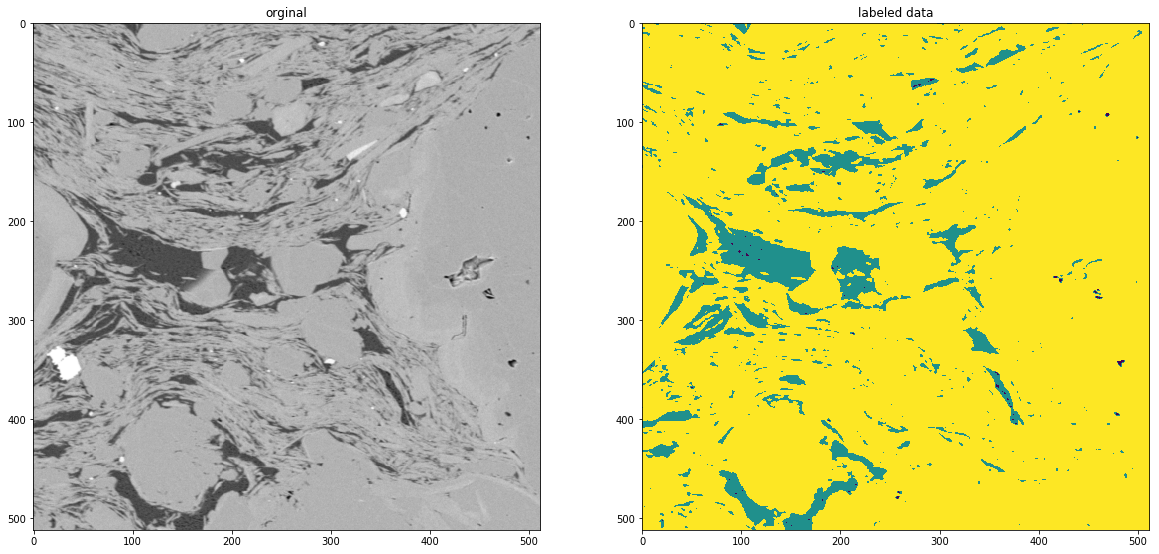

In [247]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(aimg,cmap=cm.gray, vmin=0, vmax=255)
plt.title('orginal')

alabel = data[:,:,0] # or img2 which new labeled data
plt.subplot(122)
plt.imshow(img2)
plt.title('labeled data')

plt.show()
plt.close()

In [219]:
# how many training data samples?
n_samples = (img2 > 0).sum()
print('We have {n} samples'.format(n=n_samples))

We have 261955 samples


In [207]:
# What are our classification labels?
labels = np.unique(alabel[img2 > 0])
print('The training data include {n} classes: {classes}'.format(n=labels.size, 
                                                                classes=labels))

The training data include 3 classes: [1. 2. 3.]


In [222]:
X = aimg[img2 >= 0]  # include 8th band, which is Fmask, for now
y = img2[img2 >= 0]

In [223]:
X1 = layerimg[img2 >= 0]
X1.shape

(262144, 9)

In [224]:
print('Our X1 matrix is sized: {sz}'.format(sz=X1.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))

Our X1 matrix is sized: (262144, 9)
Our y array is sized: (262144,)


In [35]:
X= X.reshape(-1, 1)


In [36]:
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))

Our X matrix is sized: (262144, 1)
Our y array is sized: (262144,)


In [225]:
from sklearn.ensemble import RandomForestClassifier

# Initialize our model with 500 trees - changed to 100 as per in lastic and setting n_jobs = -1
rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1)

# Fit our model to training data
rf = rf.fit(X1, y)

In [226]:
print('Our OOB prediction of accuracy is: {oob}%'.format(oob=rf.oob_score_ * 100))


Our OOB prediction of accuracy is: 99.42741394042969%


In [227]:
import pandas as pd

# Setup a dataframe -- just like R
df = pd.DataFrame()
df['truth'] = y
df['predict'] = rf.predict(X1)

# Cross-tabulate predictions
print(pd.crosstab(df['truth'], df['predict'], margins=True))

predict    0      1       2     All
truth                              
0        189      0       0     189
1          0  23951       0   23951
2          0      0  238004  238004
All      189  23951  238004  262144


In [228]:
pred = df['predict']
pred = np.array(pred)
pred.shape

(262144,)

In [229]:
pred = pred.reshape(512, 512)
pred.shape

(512, 512)

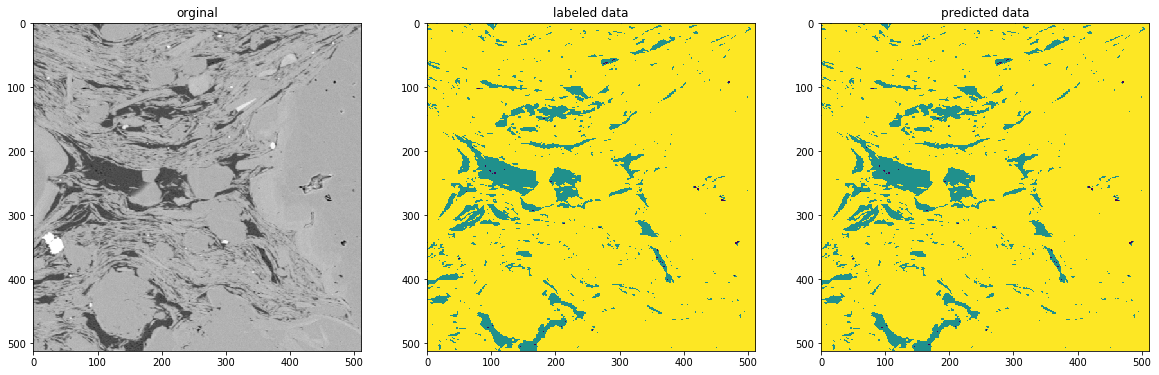

In [248]:
plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(aimg,cmap=cm.gray, vmin=0, vmax=255)
plt.title('orginal')

alabel = data[:,:,0]
plt.subplot(132)
plt.imshow(img2)
plt.title('labeled data')

plt.subplot(133)
plt.imshow(pred)
plt.title('predicted data')

plt.show()
plt.close()

# Predicting on new image from trained random forest model

In [232]:
new = '/home/admin66/Downloads/traindata/Woodford_25nm_8bit_20040x17543/Woodford_25nm_8bit_20040x17543(0x1).png'
newimg = Image.open(new)# if you want to convert from color to gray use>> .convert('LA') <<ar the end
anewimg = np.array(newimg)

layerNewImg = np.empty((512, 512, 9))
layerNewImg[:,:,0] = anewimg 
layerNewImg[:,:,1] = gaussian_filter(anewimg, sigma=1.6) 
layerNewImg[:,:,2] = ndimage.gaussian_laplace(anewimg, sigma=2) 
layerNewImg[:,:,3] = ndimage.gaussian_gradient_magnitude(anewimg, sigma=3.6) 
layerNewImg[:,:,4] = layerNewImg[:,:,3] - layerNewImg[:,:,2] #gradMagGaussian - lapGaussian
Axx, Axy, Ayy = structure_tensor(anewimg, sigma=1.6)
eigenvalues = structure_tensor_eigvals(Axx, Axy, Ayy)
layerNewImg[:,:,5] = eigenvalues[0]
layerNewImg[:,:,6] = eigenvalues[1] 

H_elems = hessian_matrix(anewimg, sigma=1.6)
H_Eigenvalues = hessian_matrix_eigvals(H_elems)
layerNewImg[:,:,7] = H_Eigenvalues[0] 
layerNewImg[:,:,8] = H_Eigenvalues[1]

newX = layerNewImg[alabel >= 0]  
newX.shape
newpred = rf.predict(newX)

/home/admin66/anaconda3/lib/python3.7/site-packages/skimage/feature/corner.py:167: UserWarning: deprecation warning: the default order of the hessian matrix values will be "row-column" instead of "xy" starting in skimage version 0.15. Use order="rc" or order="xy" to set this explicitly
  warn('deprecation warning: the default order of the hessian matrix values '


In [233]:
newpred = newpred.reshape(512, 512)
newpred.shape

(512, 512)

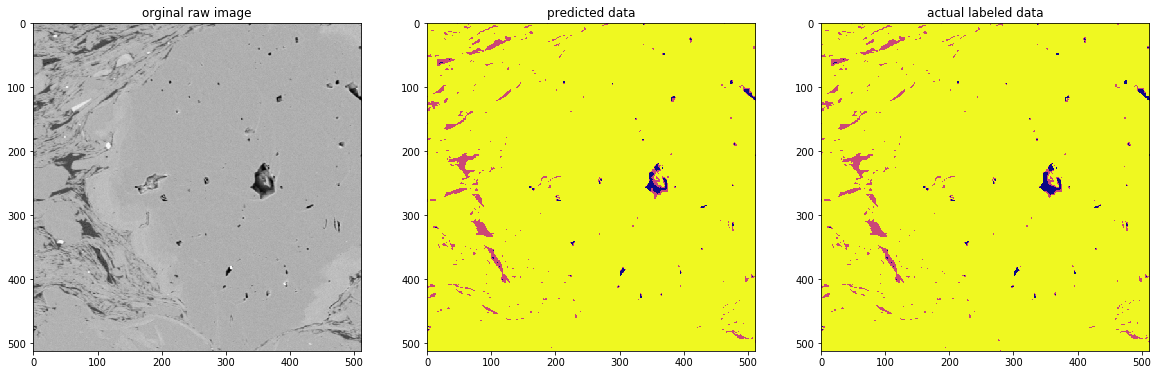

In [239]:
a = '/home/admin66/Downloads/labels/Woodford_25nm_8bit_20040x17543/Woodford_25nm_8bit_20040x17543(0x1).png'
actual = Image.open(a)# if you want to convert from color to gray use>> .convert('LA') <<ar the end
actual = np.array(actual)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(anewimg,cmap=cm.gray, vmin=0, vmax=255)
plt.title('orginal raw image')

plt.subplot(132) 
plt.imshow(newpred,cmap=plt.cm.plasma)
plt.title('predicted data')

plt.subplot(133) 
plt.imshow(actual,cmap=plt.cm.plasma)
plt.title('actual labeled data')

plt.show()
plt.close()

# Another sample predictions 

In [249]:
def predictlabels(imagename):
    new = '/home/admin66/Downloads/traindata/Woodford_25nm_8bit_20040x17543/'+imagename+'.png'
    newimg = Image.open(new)# if you want to convert from color to gray use>> .convert('LA') <<ar the end
    anewimg = np.array(newimg)

    layerNewImg = np.empty((512, 512, 9))
    layerNewImg[:,:,0] = anewimg 
    layerNewImg[:,:,1] = gaussian_filter(anewimg, sigma=1.6) 
    layerNewImg[:,:,2] = ndimage.gaussian_laplace(anewimg, sigma=2) 
    layerNewImg[:,:,3] = ndimage.gaussian_gradient_magnitude(anewimg, sigma=3.6) 
    layerNewImg[:,:,4] = layerNewImg[:,:,3] - layerNewImg[:,:,2] #gradMagGaussian - lapGaussian
    Axx, Axy, Ayy = structure_tensor(anewimg, sigma=1.6)
    eigenvalues = structure_tensor_eigvals(Axx, Axy, Ayy)
    layerNewImg[:,:,5] = eigenvalues[0]
    layerNewImg[:,:,6] = eigenvalues[1] 

    H_elems = hessian_matrix(anewimg, sigma=1.6)
    H_Eigenvalues = hessian_matrix_eigvals(H_elems)
    layerNewImg[:,:,7] = H_Eigenvalues[0] 
    layerNewImg[:,:,8] = H_Eigenvalues[1]

    newX = layerNewImg[alabel >= 0]  
    newX.shape
    newpred = rf.predict(newX)
    newpred.shape

    newpred = newpred.reshape(512, 512)

    a = '/home/admin66/Downloads/labels/Woodford_25nm_8bit_20040x17543/'+imagename+'.png'
    actual = Image.open(a)# if you want to convert from color to gray use>> .convert('LA') <<ar the end
    actual = np.array(actual)

    plt.figure(figsize=(20,10))

    plt.subplot(131)
    plt.imshow(anewimg,cmap=cm.gray, vmin=0, vmax=255)
    plt.title('orginal raw image')

    plt.subplot(132) 
    plt.imshow(newpred)
    plt.title('predicted data')

    plt.subplot(133) 
    plt.imshow(actual)
    plt.title('actual labeled data')

    plt.show()
    plt.close()

/home/admin66/anaconda3/lib/python3.7/site-packages/skimage/feature/corner.py:167: UserWarning: deprecation warning: the default order of the hessian matrix values will be "row-column" instead of "xy" starting in skimage version 0.15. Use order="rc" or order="xy" to set this explicitly
  warn('deprecation warning: the default order of the hessian matrix values '


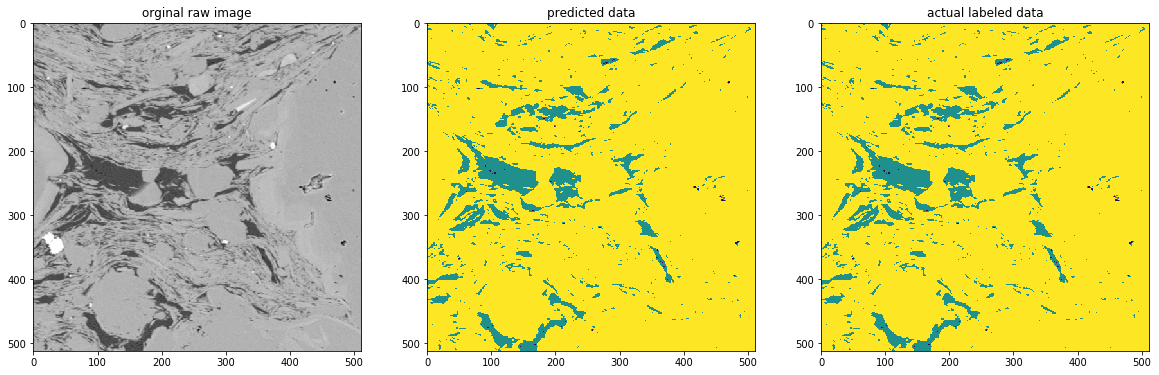

In [250]:
predictlabels('Woodford_25nm_8bit_20040x17543(0x0)')

/home/admin66/anaconda3/lib/python3.7/site-packages/skimage/feature/corner.py:167: UserWarning: deprecation warning: the default order of the hessian matrix values will be "row-column" instead of "xy" starting in skimage version 0.15. Use order="rc" or order="xy" to set this explicitly
  warn('deprecation warning: the default order of the hessian matrix values '


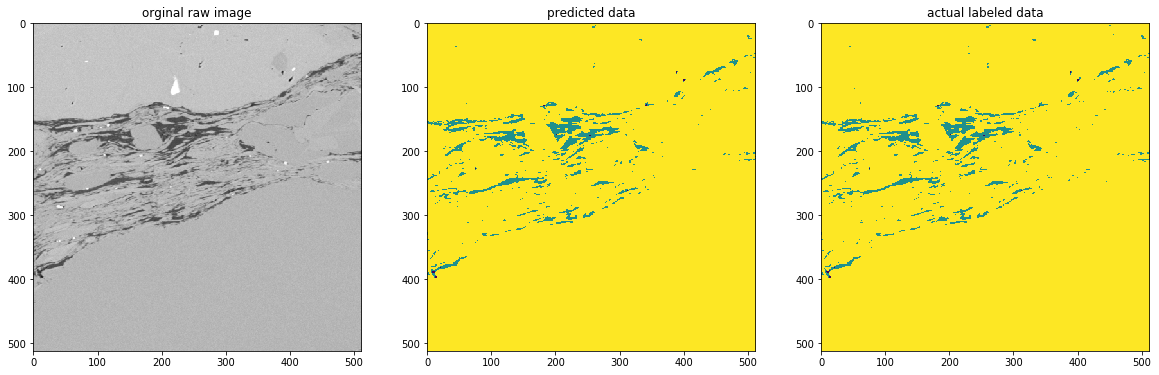

In [251]:
predictlabels('Woodford_25nm_8bit_20040x17543(0x23)')